### Maximizing Revenue for taxi drivers through Payment-Type Analysis
## Problem Statement
Revenue of Taxi cab drivers is one of the most essential parameter for long term success and Driver satisfaction. Our goal is to use data driven insights to maximize revenue streams for taxi drivers in order to meet this need.
Our Analysis aims to determine whether payments methods have impact on fare pricing by focusing the relationship between payment type and fare amount

## Objective
This project's main objective is to run an A/B testing to examine the relation ship between the total fare and the method of payment. We use python hypothesis testing and descriptive stats to extract useful information that can help taxi drivers to generate more cash.
In particular, we want to find out if there is a big difference in the fares for those who pay with credit card versus those who pay with cash.

## Research Question
Is  there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st 
import warnings 
warnings.filterwarnings('ignore')
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Loading Dataset

In [3]:
file_path = '/yellow_tripdata_2020-01.csv'
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "microize/newyork-yellow-taxi-trip-data-2020-2019",
  file_path,)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


# Exploratory Data Analysis


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [8]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [9]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [12]:
df.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
duration                     0
dtype: int64

In [13]:
65441/len(df) *100

1.021716132126611

## 65441 aise records h jo NAN h, that means ki 1% data is null, we can simply drop them, it wont affect our analysis that much

## Feature Selection or Filtering

In [14]:
df = df[['duration','passenger_count','trip_distance','payment_type','fare_amount']]
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1.0,1.20,1.0,6.00
1,7.416667,1.0,1.20,1.0,7.00
2,6.183333,1.0,0.60,1.0,6.00
3,4.850000,1.0,0.80,1.0,5.50
4,2.300000,1.0,0.00,2.0,3.50
...,...,...,...,...,...
6405003,31.000000,NaN,3.24,NaN,17.59
6405004,76.000000,NaN,22.13,NaN,46.67
6405005,27.833333,NaN,10.51,NaN,48.85
6405006,22.650000,NaN,5.49,NaN,27.17


## Handling Null values

In [15]:
df.isna().sum()

duration               0
passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
dtype: int64

In [16]:
df.isna().value_counts()

duration  passenger_count  trip_distance  payment_type  fare_amount
False     False            False          False         False          6339567
          True             False          True          False            65441
Name: count, dtype: int64

In [17]:
df.dropna(inplace=True)


In [18]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1.0,1.20,1.0,6.0
1,7.416667,1.0,1.20,1.0,7.0
2,6.183333,1.0,0.60,1.0,6.0
3,4.850000,1.0,0.80,1.0,5.5
4,2.300000,1.0,0.00,2.0,3.5
...,...,...,...,...,...
6339562,14.233333,1.0,2.10,1.0,11.0
6339563,19.000000,1.0,2.13,1.0,13.0
6339564,16.283333,1.0,2.55,1.0,12.5
6339565,9.633333,1.0,1.61,2.0,8.5


In [19]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [20]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,1,6.0
1,7.416667,1,1.20,1,7.0
2,6.183333,1,0.60,1,6.0
3,4.850000,1,0.80,1,5.5
4,2.300000,1,0.00,2,3.5
...,...,...,...,...,...
6339562,14.233333,1,2.10,1,11.0
6339563,19.000000,1,2.13,1,13.0
6339564,16.283333,1,2.55,1,12.5
6339565,9.633333,1,1.61,2,8.5


In [21]:
df['payment_type'].value_counts()

payment_type
1    4694897
2    1593834
3      32770
4      18065
5          1
Name: count, dtype: int64

# Checking for duplicate values

In [22]:
df.duplicated().value_counts()

True     3331706
False    3007861
Name: count, dtype: int64

In [23]:
df[df.duplicated()]

,duration,passenger_count,trip_distance,payment_type,fare_amount
2056,0.000000,1,0.00,2,7.0
2441,0.200000,1,0.00,1,52.0
2446,13.066667,2,1.70,1,9.5
2465,3.083333,1,0.40,1,4.0
3344,5.350000,1,1.20,1,6.0
...,...,...,...,...,...
6339558,8.800000,1,1.63,2,8.0
6339559,8.016667,1,1.81,1,8.5
6339560,6.900000,1,0.98,2,6.5
6339562,14.233333,1,2.10,1,11.0


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,1,6.0
1,7.416667,1,1.20,1,7.0
2,6.183333,1,0.60,1,6.0
3,4.850000,1,0.80,1,5.5
4,2.300000,1,0.00,2,3.5
...,...,...,...,...,...
6339555,14.800000,3,2.09,1,10.0
6339561,21.500000,1,4.11,1,17.5
6339563,19.000000,1,2.13,1,13.0
6339564,16.283333,1,2.55,1,12.5


## Validating Data
Eliminating unnecessary values in passenger count (like 0 passengers or more than 6 passengers).
similarly with payment type, removing negligible types contributing less than 1% 

In [26]:
df['passenger_count'].value_counts(normalize = True) 

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [27]:
df['payment_type'].value_counts(normalize = True) 

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [28]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']<=5) & (df['passenger_count']>0)]

In [29]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,1,6.0
1,7.416667,1,1.20,1,7.0
2,6.183333,1,0.60,1,6.0
3,4.850000,1,0.80,1,5.5
4,2.300000,1,0.00,2,3.5
...,...,...,...,...,...
6339555,14.800000,3,2.09,1,10.0
6339561,21.500000,1,4.11,1,17.5
6339563,19.000000,1,2.13,1,13.0
6339564,16.283333,1,2.55,1,12.5


# Decoding payment type for better Readability

In [30]:
df['payment_type'].replace([1,2,], ['card','cash'], inplace=True)

In [31]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,card,6.0
1,7.416667,1,1.20,card,7.0
2,6.183333,1,0.60,card,6.0
3,4.850000,1,0.80,card,5.5
4,2.300000,1,0.00,cash,3.5
...,...,...,...,...,...
6339555,14.800000,3,2.09,card,10.0
6339561,21.500000,1,4.11,card,17.5
6339563,19.000000,1,2.13,card,13.0
6339564,16.283333,1,2.55,card,12.5


# Now, we have clean, ready to perfom analysis dataset

## Exploring Neumerical Data

In [32]:
df.describe()

,duration,passenger_count,trip_distance,fare_amount
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,2.415478e+01,1.733386e+00,4.536729e+00,1.780567e+01
std,9.260031e+01,1.176652e+00,4.895890e+00,1.506997e+01
min,-2.770367e+03,1.000000e+00,-2.218000e+01,-5.000000e+02
25%,9.883333e+00,1.000000e+00,1.500000e+00,9.000000e+00
50%,1.573333e+01,1.000000e+00,2.730000e+00,1.300000e+01
75%,2.336667e+01,2.000000e+00,5.470000e+00,2.100000e+01
max,8.525117e+03,5.000000e+00,2.628800e+02,4.265000e+03


# Found that there are values in negative, also we can see this dataset contains huge amount of outliers.
# And it needs to be cleaned 

In [33]:
df = df[df['duration']>0]
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]

In [34]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,card,6.0
1,7.416667,1,1.20,card,7.0
2,6.183333,1,0.60,card,6.0
3,4.850000,1,0.80,card,5.5
5,0.883333,1,0.03,cash,2.5
...,...,...,...,...,...
6339550,12.383333,4,2.40,card,10.5
6339555,14.800000,3,2.09,card,10.0
6339561,21.500000,1,4.11,card,17.5
6339563,19.000000,1,2.13,card,13.0


In [35]:
df.describe()

,duration,passenger_count,trip_distance,fare_amount
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,2.418261e+01,1.738151e+00,4.583313e+00,1.766835e+01
std,9.272285e+01,1.179440e+00,4.897806e+00,1.447531e+01
min,1.666667e-02,1.000000e+00,1.000000e-02,1.000000e-02
25%,9.950000e+00,1.000000e+00,1.530000e+00,9.000000e+00
50%,1.575000e+01,1.000000e+00,2.770000e+00,1.300000e+01
75%,2.333333e+01,2.000000e+00,5.500000e+00,2.100000e+01
max,8.525117e+03,5.000000e+00,2.628800e+02,4.265000e+03


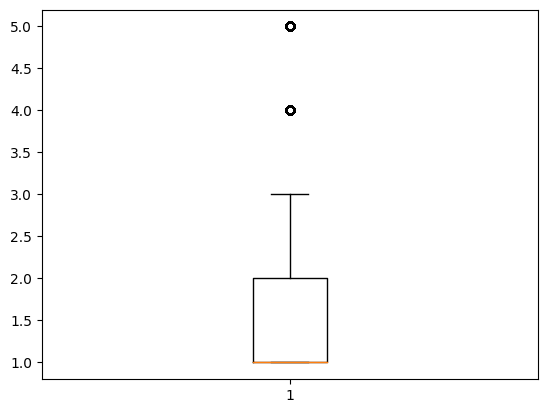

In [36]:
plt.boxplot(x=df['passenger_count'])
plt.show()

# Removing Outliers

In [37]:
for colunm in ['duration', 'trip_distance', 'fare_amount']:
    q1 = df[colunm].quantile(0.25)
    q3 = df[colunm].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[colunm]>=lower_bound) & (df[colunm]<=upper_bound)]
    

In [38]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,card,6.0
1,7.416667,1,1.20,card,7.0
2,6.183333,1,0.60,card,6.0
3,4.850000,1,0.80,card,5.5
5,0.883333,1,0.03,cash,2.5
...,...,...,...,...,...
6339550,12.383333,4,2.40,card,10.5
6339555,14.800000,3,2.09,card,10.0
6339561,21.500000,1,4.11,card,17.5
6339563,19.000000,1,2.13,card,13.0


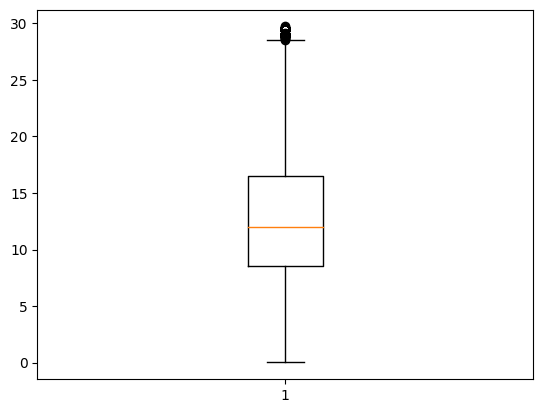

In [39]:
plt.boxplot(x=df['fare_amount'])
plt.show()

In [40]:
df.describe()

,duration,passenger_count,trip_distance,fare_amount
count,2.346979e+06,2.346979e+06,2.346979e+06,2.346979e+06
mean,1.491374e+01,1.781688e+00,2.972173e+00,1.296565e+01
std,7.563986e+00,1.207904e+00,2.114805e+00,6.098336e+00
min,1.666667e-02,1.000000e+00,1.000000e-02,1.000000e-02
25%,9.150000e+00,1.000000e+00,1.400000e+00,8.500000e+00
50%,1.413333e+01,1.000000e+00,2.380000e+00,1.200000e+01
75%,1.976667e+01,2.000000e+00,3.970000e+00,1.650000e+01
max,4.340000e+01,5.000000e+00,1.025000e+01,2.973000e+01


# Visualising Cleaned data for Better understanding of dataset

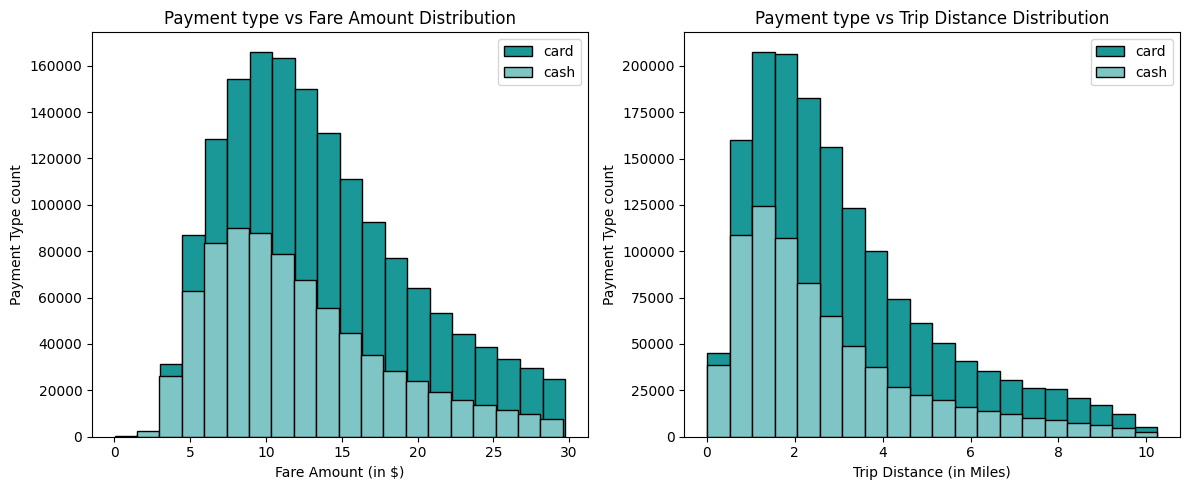

In [41]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.hist(df[df['payment_type']=='card']['fare_amount'], histtype='barstacked',bins = 20, edgecolor = 'k', color = '#1a9797', label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#80c5c5', label='cash')

plt.title('Payment type vs Fare Amount Distribution')
plt.xlabel("Fare Amount (in $)")
plt.ylabel("Payment Type count")
plt.legend() 

plt.subplot(1,2,2)

plt.hist(df[df['payment_type']=='card']['trip_distance'], histtype='barstacked',bins = 20, edgecolor = 'k', color = '#1a9797', label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#80c5c5', label='cash')

plt.title('Payment type vs Trip Distance Distribution')
plt.xlabel("Trip Distance (in Miles)")
plt.ylabel("Payment Type count")
plt.legend() 

plt.tight_layout()
plt.show()


In [42]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           13.419372  6.135066      3.102735  2.129750
cash           12.026761  5.912055      2.701996  2.057393

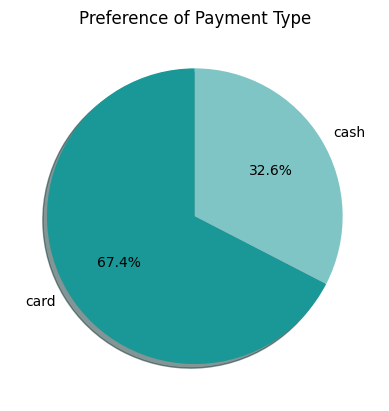

In [43]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(), shadow = True, autopct = '%1.1f%%', colors = ['#1a9797','#80c5c5'], startangle = 90, labels = df['payment_type'].value_counts().index )
plt.show()

In [44]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,card,6.0
1,7.416667,1,1.20,card,7.0
2,6.183333,1,0.60,card,6.0
3,4.850000,1,0.80,card,5.5
5,0.883333,1,0.03,cash,2.5
...,...,...,...,...,...
6339550,12.383333,4,2.40,card,10.5
6339555,14.800000,3,2.09,card,10.0
6339561,21.500000,1,4.11,card,17.5
6339563,19.000000,1,2.13,card,13.0


In [45]:
passenger_count_by_payment_type = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count_by_payment_type.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count_by_payment_type.reset_index(inplace=True)

In [46]:
passenger_count_by_payment_type


,payment_type,passenger_count,count
0,card,1,935862
1,card,2,333004
2,card,3,123763
3,card,4,64295
4,card,5,125399
5,cash,1,470577
6,cash,2,157790
7,cash,3,55176
8,cash,4,32999
9,cash,5,48114


In [47]:
passenger_count_by_payment_type['percentage'] = (passenger_count_by_payment_type['count']/passenger_count_by_payment_type['count'].sum())*100

In [48]:
passenger_count_by_payment_type

,payment_type,passenger_count,count,percentage
0,card,1,935862,39.875176
1,card,2,333004,14.188623
2,card,3,123763,5.273290
3,card,4,64295,2.739479
4,card,5,125399,5.342996
5,cash,1,470577,20.050329
6,cash,2,157790,6.723111
7,cash,3,55176,2.350937
8,cash,4,32999,1.406020
9,cash,5,48114,2.050040


In [49]:
df1 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df1.payment_type = ['card','cash']


In [50]:
df1.iloc[0,1:] = passenger_count_by_payment_type.iloc[0:5,-1]
df1.iloc[1,1:] = passenger_count_by_payment_type.iloc[5:,-1]

In [51]:
df1

,payment_type,1,2,3,4,5
0,card,39.875176,14.188623,5.27329,2.739479,5.342996
1,cash,20.050329,6.723111,2.350937,1.40602,2.05004


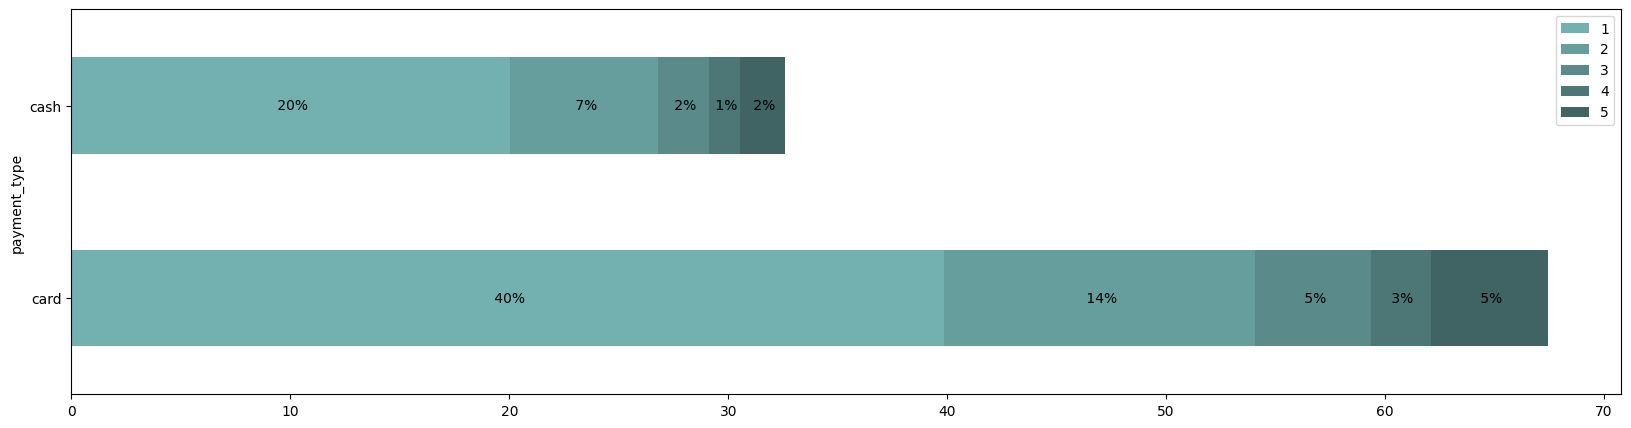

In [52]:
fig, ax = plt.subplots(figsize=(20,5))
df1.plot(kind='barh', x='payment_type', stacked = True, color = ['#73b1b1','#669e9e','#5a8a8a','#4d7676','#406363'],ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.text(x + width / 2,
            y + height / 2,
            f'{width: .0f}%',  # Format the text (e.g., as an integer)
            ha='center',      # Horizontal alignment
            va='center',      # Vertical alignment
            color='k')    # Text color for better visibility

## Till now we are done with the visualisations, we have found that people prefer to pay with card rather than cash when trip distance and fare amount is large also visualised how passenger count influence preference of payment type of card over cash.
## Next we have to prove our conclusions using hypothesis testing that whether fare amount is influenced by payment method or not.

null hypothesis: There is no difference in fare amount between cash and card payments
alternate hypothesis: There is difference in fare amount between cash and card payments


# Before we proceed to choose the suitable test, we have to check whether the sample is normally distributed or not

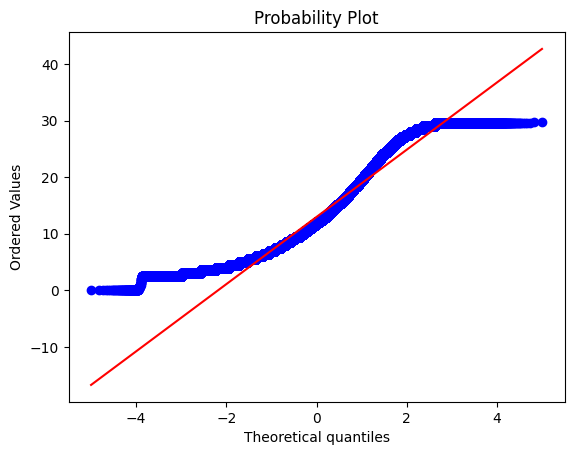

In [53]:
import scipy.stats as stats


stats.probplot(df["fare_amount"], dist="norm", plot=plt)
plt.show()

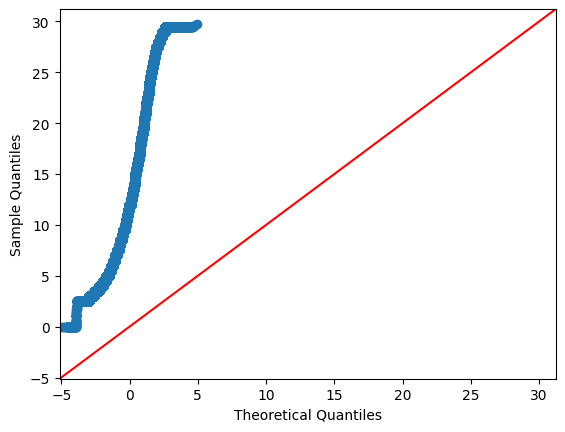

In [54]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'], line ='45')
plt.show()

# As we can see from the q-q plot result, the data is definately not normally distrbuted so we can not use z-test for hypothesis testing, 
# this is a discrete numerical data so other tests like chi square and annova test cannot be used.
# t-test is the most suitable test in this particular situation and will procced with t-test.

In [55]:
df

,duration,passenger_count,trip_distance,payment_type,fare_amount
0,4.800000,1,1.20,card,6.0
1,7.416667,1,1.20,card,7.0
2,6.183333,1,0.60,card,6.0
3,4.850000,1,0.80,card,5.5
5,0.883333,1,0.03,cash,2.5
...,...,...,...,...,...
6339550,12.383333,4,2.40,card,10.5
6339555,14.800000,3,2.09,card,10.0
6339561,21.500000,1,4.11,card,17.5
6339563,19.000000,1,2.13,card,13.0


# Preparing samples of fare amount based on card and cash payment type

In [56]:
card_payers = df[df['payment_type']=='card']['fare_amount']
cash_payers = df[df['payment_type']=='cash']['fare_amount']

In [57]:
card_payers

0           6.0
1           7.0
2           6.0
3           5.5
9           8.0
           ... 
6339550    10.5
6339555    10.0
6339561    17.5
6339563    13.0
6339564    12.5
Name: fare_amount, Length: 1582323, dtype: float64

In [58]:
cash_payers

5           2.5
11          9.5
15          9.0
17         11.5
18         24.5
           ... 
6339487     6.5
6339503    27.5
6339517    10.5
6339527    12.5
6339529    26.0
Name: fare_amount, Length: 764656, dtype: float64

# Performing t-test
## Since it is a independent two-sample test as both samples are independent (having unequal variance), we will use t-test_ind form scipy.stats

In [59]:
import scipy.stats as stats

In [60]:
t_test_stats, p_value = stats.ttest_ind(a = card_payers, b= cash_payers, equal_var = True)
t_test_stats, p_value

(164.90973651399426, 0.0)

# We got our p-value = 0.0 which definately less than significant value i.e 0.05 
# We have to reject null hypothesis
# The results says that there is significant difference in fare amount between customers who pay using cash and card.
# Hence We can conclude that payment method influence overall fare amount collected by drivers.


# Recomendations:
## **We can encourage customers to pay with credit cards for generating more revenue for cab drivers.**
## **Implement strategies such as incentives or discounts on credit card transactions to choose this payment method.**
## **Providing seamless and secure to enhance user experience that will encourage adoption of this payment method.**